In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib

In [103]:
bp = pd.read_csv('../logs/maze2d-umaze-v1/plans/defaults/freq1_H15_beam128/0/BEAM_PLAN-rollout.csv')
qbp = pd.read_csv('../logs/maze2d-umaze-v1/plans/defaults/freq1_H15_beam128/0/Q_BEAM_PLAN-rollout.csv')
mcts = pd.read_csv('../logs/maze2d-umaze-v1/plans/defaults/freq1_H15_beam128/0/week_MCTS-rollout.csv')
bp.head()

,Unnamed: 0,x,y,vx,vy,goalx,goaly,reward,score
0,0,1.000000,1.500000,0.000001,-0.000001,1,1,0,-0.172814
1,1,0.999687,1.502382,-0.031251,0.238163,1,1,0,-0.172814
2,2,0.999878,1.502408,0.019016,0.002653,1,1,0,-0.172814
3,3,0.999576,1.500085,-0.030168,-0.232296,1,1,0,-0.172814
4,4,0.998904,1.498923,-0.067237,-0.116257,1,1,0,-0.172814


In [120]:
def show_traj(df_list, names):
    

    BIGGER_SIZE = 25
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    fig, ax = plt.subplots(figsize=(12,8))
    
    for i, name in zip(df_list, names):
        if name == 'Q-DA':
            plt.scatter(x = i['x'], y = i['y'],lw=0.05,alpha=0.7,c='tab:blue', s=200, label=name)#,s=obs['size'],c=obs['color'])
            plt.scatter(x = i['goalx'], y = i['goaly'],lw=0.05, c='red',marker='*',s=300, label='Goals')#,s=obs['size'],c=obs['color'])
        elif name == 'DA':
            plt.scatter(x = i['x'], y = i['y'],lw=0.05, alpha=0.3,c='tab:green', s=200, label=name)#,s=obs['size'],c=obs['color'])
        elif name == 'MCTS':
            plt.scatter(x = i['x'], y = i['y'],lw=0.05, alpha=0.3,c='tab:red', s=200, label=name)#,s=obs['size'],c=obs['color'])
    # plt.xlim((0.9,1.1))
    # plt.ylim((0.75,2.25))
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
    plt.legend(loc='lower right')
    plt.savefig('render.png', dpi=800, bbox_inches='tight')
    plt.show()

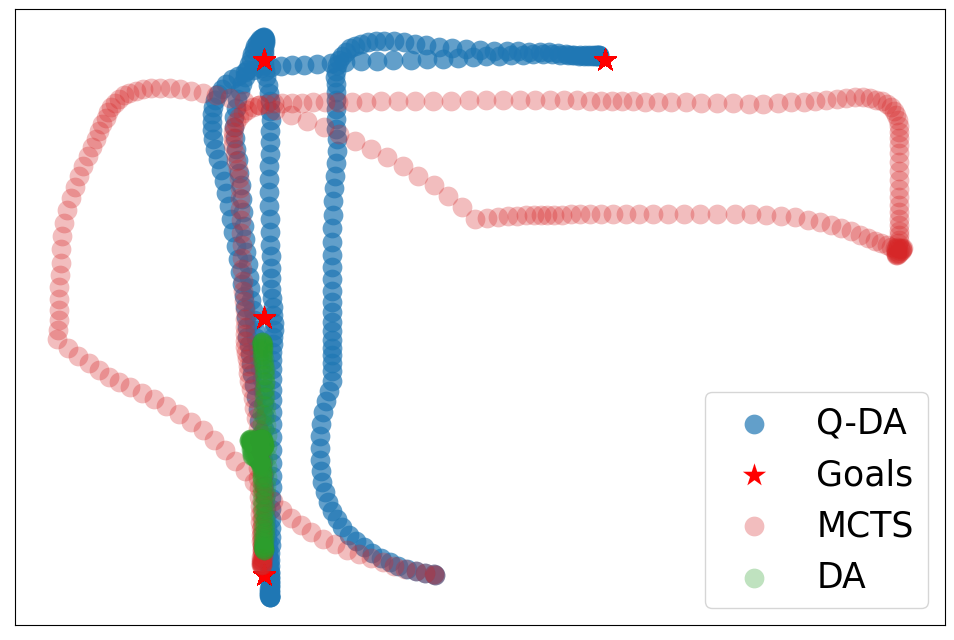

In [121]:
show_traj([qbp, mcts, bp], ['Q-DA','MCTS','DA'])


In [ ]:
mcts['reward'].sum()

1.0